In [1]:
import gym
import numpy as np
env = gym.make('CartPole-v1')
env.seed(101)
np.random.seed(101)
import torch

print('observation space:', env.observation_space)
print('action space:', env.action_space.n)

observation space: Box(4,)
action space: 2


MovieWriter Pillow unavailable; using Pillow instead.


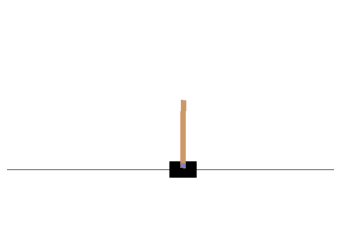

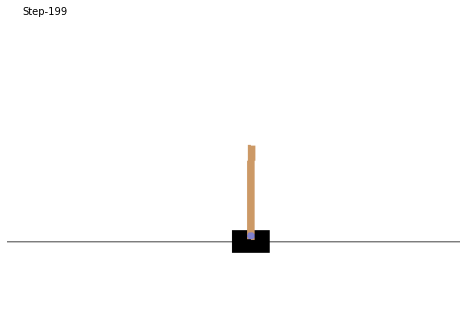

In [2]:

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import animation
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

from agent import Agent

agent = Agent(env)
agent.load_state_dict(torch.load('../checkpointCartPole.pth'))
frames = []
def save_frames_as_gif(frames, path='./', filename='gym_animation.gif'):

    #Mess with this to change frame size
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)

    patch = plt.imshow(frames[0])
    plt.axis('off')
    axisDisplay = 'Step-' + str(0)
    text = plt.text(20, 0, axisDisplay)
    def animate(i):
        patch.set_data(frames[i])
        axisDisplay = 'Step-' + str(i)
        text.set_text(axisDisplay)
        
 
    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    anim.save(path + filename, writer='Pillow', fps=60)

state = env.reset()
img = plt.imshow(env.render(mode='rgb_array'))
frames.append(env.render(mode="rgb_array"))
for i in range(1,200):
    state = torch.from_numpy(state).float()
    with torch.no_grad():
        action = agent.forward(state)
    next_state, reward, done, _ = env.step(np.argmax(action.numpy()))
    img.set_data(env.render(mode='rgb_array')) 
    frames.append(env.render(mode='rgb_array'))    
    plt.axis('off')
    axisDisplay = 'Step-' + str(i)
    text = plt.text(20, 0, axisDisplay)
    display.display(plt.gcf())
    display.clear_output(wait=True)    
    text.set_visible(False)
    state = next_state
    if done:
        break

env.close()
save_frames_as_gif(frames)

MovieWriter Pillow unavailable; using Pillow instead.


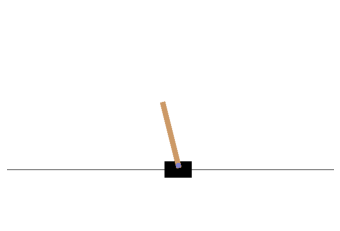

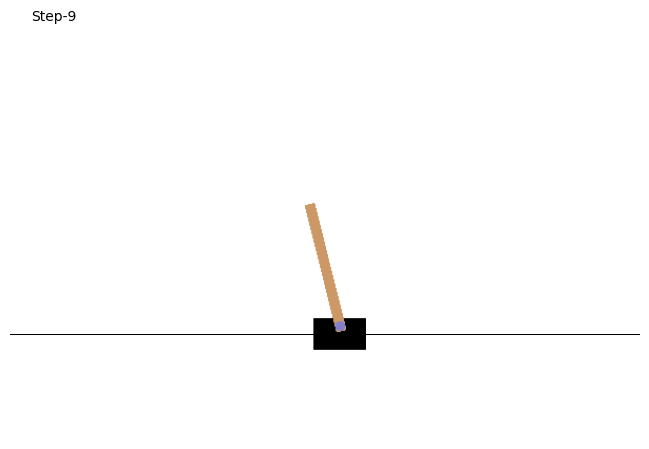

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import animation
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

def save_frames_as_gif(frames, path='./', filename='untrainedCartPoleAgent.gif'):

    #Mess with this to change frame size
    plt.figure(figsize=(frames[0].shape[1]/72.0 , frames[0].shape[0]/72.0), dpi=72)

    patch = plt.imshow(frames[0])
    plt.axis('off')
    axisDisplay = 'Step-' + str(0)
    text = plt.text(20, 0, axisDisplay)
    def animate(i):
        patch.set_data(frames[i])
        axisDisplay = 'Step-' + str(i)
        text.set_text(axisDisplay)
        
 
    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    anim.save(path + filename, writer='Pillow', fps=60)

from agent import Agent

agent = Agent(env)
frames = []

state = env.reset()
img = plt.imshow(env.render(mode='rgb_array'))
frames.append(env.render(mode="rgb_array"))
for i in range(1,200):
    state = torch.from_numpy(state).float()
    with torch.no_grad():
        action = agent.forward(state)
    next_state, reward, done, _ = env.step(np.argmax(action.numpy()))
    img.set_data(env.render(mode='rgb_array'))
    frames.append(env.render(mode="rgb_array"))
    plt.axis('off')
    axisDisplay = 'Step-' + str(i)
    text = plt.text(20, 0, axisDisplay)
    display.display(plt.gcf())
    display.clear_output(wait=True)    
    text.set_visible(False)
    state = next_state
    if done:
        break

env.close()
save_frames_as_gif(frames)


fig size: 72.0 DPI, size in inches [6. 4.]


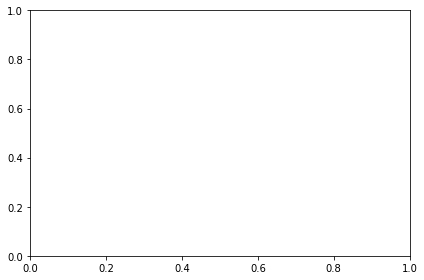

In [4]:
fig, ax = plt.subplots()
fig.set_tight_layout(True)
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))